In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")
#Reading in the datasets of NBA player's contract salaries and stats from the past season
df_salaries = pd.read_csv('../data/raw/Attempt2_salaries.csv')
df_stats = pd.read_csv('../data/raw/Attempt2_stats.csv')

In [13]:
df_salaries.head(10)
df_stats.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
5,6,Cole Aldrich\aldrico01,C,29,MIN,21,0,2.3,0.2,0.7,...,0.333,0.1,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6
6,7,LaMarcus Aldridge\aldrila01,C,32,SAS,75,75,33.5,9.2,18.0,...,0.837,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1
7,8,Jarrett Allen\allenja01,C,19,BRK,72,31,20.0,3.3,5.5,...,0.776,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2
8,9,Kadeem Allen\allenka01,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.778,0.2,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1
9,10,Tony Allen\allento01,SF,36,NOP,22,0,12.4,2.0,4.1,...,0.524,0.9,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7


In [14]:
#replacing dollar signs in salaries
df_salaries['2018-19'] = [x.strip('$') for x in df_salaries['2018-19']]
df_salaries = df_salaries.drop(['2019-20'], axis=1)
df_salaries = df_salaries.drop(['2020-21'], axis=1)
df_salaries[['2018-19']] = df_salaries[['2018-19']].apply(pd.to_numeric)
df_salaries.head()

,Rk,Player,Tm,2018-19
0,1,Stephen Curry\curryst01,GSW,37457154
1,2,Chris Paul\paulch01,HOU,35654150
2,3,LeBron James\jamesle01,LAL,35654150
3,4,Russell Westbrook\westbru01,OKC,35350000
4,5,Blake Griffin\griffbl01,DET,31873932


In [16]:
pd.options.display.float_format = '{:.0f}'.format
df_merged = pd.merge(df_salaries, df_stats, on='Player')
df_merged.head()

,Rk_x,Player,Tm_x,2018-19,Rk_y,Pos,Age,Tm_y,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Stephen Curry\curryst01,GSW,37457154,120,PG,29,GSW,51,51,...,1,1,4,5,6,2,0,3,2,26
1,2,Chris Paul\paulch01,HOU,35654150,396,PG,32,HOU,58,58,...,1,1,5,5,8,2,0,2,2,19
2,3,LeBron James\jamesle01,LAL,35654150,248,PF,33,CLE,82,82,...,1,1,8,9,9,1,1,4,2,28
3,4,Russell Westbrook\westbru01,OKC,35350000,508,PG,29,OKC,80,80,...,1,2,8,10,10,2,0,5,2,25
4,5,Blake Griffin\griffbl01,DET,31873932,191,PF,28,TOT,58,58,...,1,1,6,7,6,1,0,3,2,21


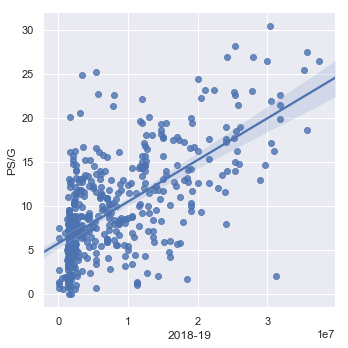

In [28]:
sns.lmplot('2018-19', 'PS/G', data=df_merged)

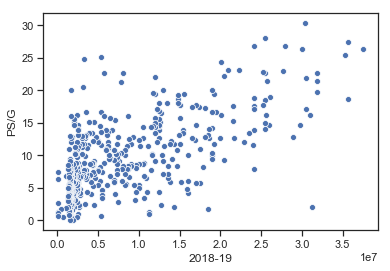

In [32]:
>>> ax = sns.scatterplot(x="2018-19", y="PS/G", 
...                      data=df_merged)

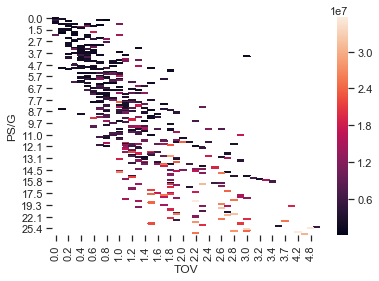

In [38]:
df = pd.pivot_table(data=df_merged,
                    index='PS/G',
                    values='2018-19',
                    columns='TOV')

ax = sns.heatmap(df)

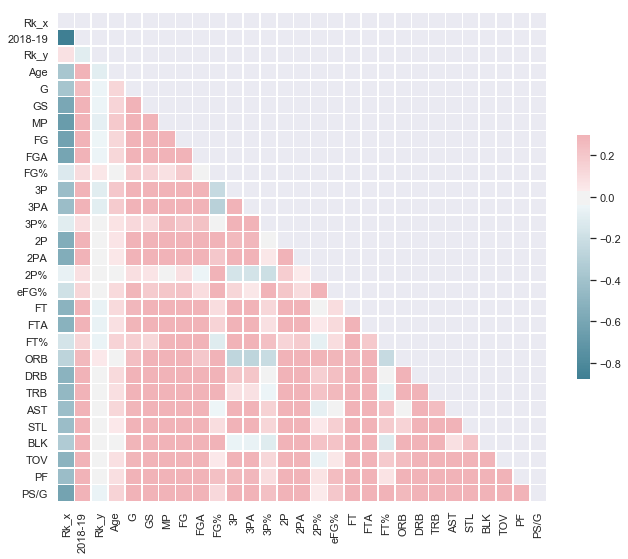

In [44]:
import numpy as np
sns.set(style="darkgrid")
# Compute the correlation matrix
corr = df_merged.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})